### Edmond Van
### Jupyter Notebook / Python Project - Sale Analysis Project
### August 2021

# Sales Analysis

#### Import necessary libraries 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
from os import listdir
from os.path import isfile, join
from itertools import combinations
from collections import Counter

# 1. Cleaning Phase

#### Task #1: Merge the 12 months of sales data into a single CSV file  

In [3]:
# Read all the files in Sales_data directory
onlyfiles = [f for f in listdir("./Sales_Data") if isfile(join("./Sales_Data", f))]
onlyfiles

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
# Concat all the files into 1 csv file
one_df = pd.DataFrame()
for file in onlyfiles: 
    df = pd.read_csv('./Sales_Data/' + file)
    one_df = pd.concat([one_df,df])
one_df.to_csv("all_data.csv", index = False)

#### Read in updated dataframe

In [5]:
up_df = pd.read_csv('all_data.csv') 
up_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Task #2: Clean the data

In [6]:
# Check the null value, if not equal 0 then there is null value in that column
# There are equally 545 null values in all columns.
up_df.count() - up_df.shape[0]

Order ID           -545
Product            -545
Quantity Ordered   -545
Price Each         -545
Order Date         -545
Purchase Address   -545
dtype: int64

In [7]:
# Show the dataframe of NaN values
nan_df = up_df[up_df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Here we'll drop all the rows containing NaN values for better performance
up_df.dropna(inplace = True, how = 'all') 
up_df.reset_index(drop=True,inplace =True)
up_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
# Double-check the dataframe whether there is still NaN value(s)
up_df.count() - up_df.shape[0]

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Task #3: Add 'Month' and 'Sales' columns

In [10]:
# Insert a 'Month' column to dataframe which we extract from the 'Order Date' column 
up_df['Month'] = up_df["Order Date"].str[0:2]

up_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [11]:
# After trying to convert datatype of the 'Month' column, there are still some characters ('Or') in 'Month' column 
false_contain_df = up_df[up_df['Month'].str.contains('Or')]
false_contain_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [12]:
# We'll drop the rows that don't have expected values
for i in up_df.index[up_df['Month'].str.contains('Or') == True]: 
    up_df = up_df.drop([i],axis=0)
up_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [13]:
up_df['Month'] = up_df['Month'].astype('int')
up_df.sort_values(by=['Month'],ascending=True)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
69191,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1
70565,144300,Apple Airpods Headphones,1,150,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1
70564,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1
70563,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1
70562,144297,Flatscreen TV,1,300,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1
...,...,...,...,...,...,...,...
47017,311693,27in FHD Monitor,1,149.99,12/06/19 18:05,"594 9th St, Dallas, TX 75001",12
47018,311694,AAA Batteries (4-pack),1,2.99,12/19/19 07:35,"905 11th St, Atlanta, GA 30301",12
47019,311695,Wired Headphones,1,11.99,12/21/19 21:06,"107 Lakeview St, San Francisco, CA 94016",12
46997,311673,USB-C Charging Cable,1,11.95,12/26/19 22:24,"169 Forest St, San Francisco, CA 94016",12


In [14]:
up_df['Quantity Ordered'] = pd.to_numeric(up_df['Quantity Ordered'].astype('int'))
up_df['Price Each'] = pd.to_numeric(up_df['Price Each'].astype('float'))
up_df['Total sales'] = up_df['Quantity Ordered'] * up_df['Price Each']

# 2. Analyzing Phase



#### Question 1: What was the best month for sales? How much was earned that month?

In [15]:
grouped_sales = up_df.groupby(['Month']).sum()
grouped_sales.reset_index(inplace=True)
grouped_sales.sort_values(by='Total sales',ascending=False).head()

,Month,Quantity Ordered,Price Each,Total sales
11,12,28114,4.588415e+06,4.613443e+06
9,10,22703,3.715555e+06,3.736727e+06
3,4,20558,3.367671e+06,3.390670e+06
10,11,19798,3.180601e+06,3.199603e+06
4,5,18667,3.135125e+06,3.152607e+06


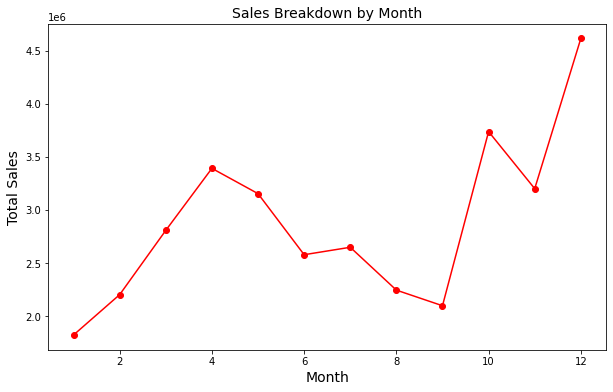

In [16]:
# Create a plot for month sales
plt.subplots(figsize=(10,6))
plt.plot(grouped_sales['Month'],grouped_sales['Total sales'],color='r',marker='o')
plt.title('Sales Breakdown by Month',fontsize=14)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Total Sales',fontsize=14)
plt.show()

#### Question 2: What city sold the most product ? 

In [17]:
# Create a city column 
def get_city(address): 
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

up_df['City'] = up_df["Purchase Address"].apply(lambda x:f"{get_city(x)} ({get_state(x)})")
up_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [18]:
cities = [city for city, df in up_df.groupby('City')]
cities

[' Atlanta (GA)',
 ' Austin (TX)',
 ' Boston (MA)',
 ' Dallas (TX)',
 ' Los Angeles (CA)',
 ' New York City (NY)',
 ' Portland (ME)',
 ' Portland (OR)',
 ' San Francisco (CA)',
 ' Seattle (WA)']

In [19]:
group_city = up_df.groupby(by = ["City"]).sum()
group_city.reset_index(inplace=True)
group_city

,City,Quantity Ordered,Price Each,Month,Total sales
0,Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
1,Austin (TX),11153,1.809874e+06,69829,1.819582e+06
2,Boston (MA),22528,3.637410e+06,141112,3.661642e+06
3,Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
4,Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
5,New York City (NY),27932,4.635371e+06,175741,4.664317e+06
6,Portland (ME),2750,4.471893e+05,17144,4.497583e+05
7,Portland (OR),11303,1.860558e+06,70621,1.870732e+06
8,San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06
9,Seattle (WA),16553,2.733296e+06,104941,2.747755e+06


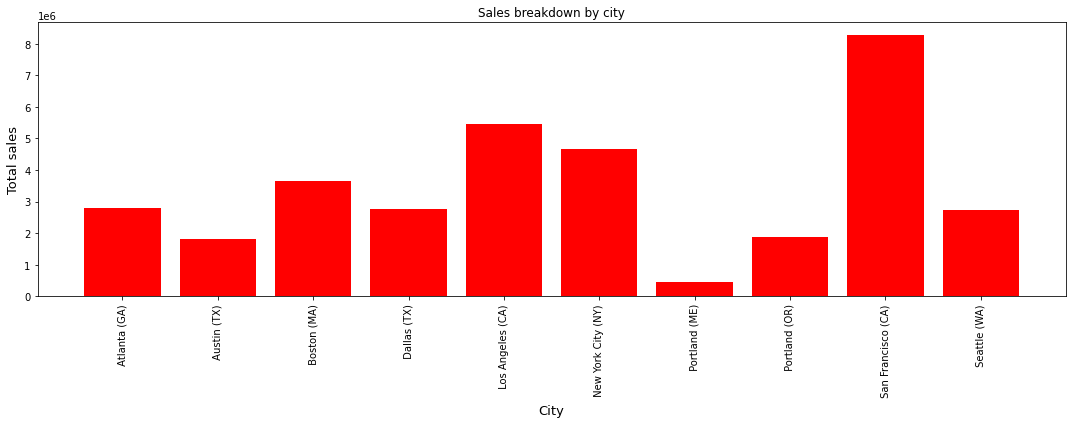

In [20]:
# Create a bar chart for visualizing
plt.figure(figsize=(15,6))
plt.bar(cities,"Total sales",data=group_city,color='r')
plt.title("Sales breakdown by city")
plt.xticks(rotation = "vertical")
plt.xlabel("City",fontsize = 13)
plt.ylabel("Total sales",fontsize = 13)
plt.tight_layout()
plt.show()

#### Question 3: What time should we display advertisements to maximize the likelihood of customer's buying product?

In [21]:
# Create a new "Time" column
up_df['Order Date'] = pd.to_datetime(up_df["Order Date"])
up_df["Hour"] = up_df["Order Date"].dt.hour
up_df["Minute"] = up_df["Order Date"].dt.minute
up_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [22]:
group_time = up_df.groupby(by = "Hour").count()
group_time.reset_index(inplace=True)
group_time

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total sales,City,Minute
0,0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831,831,831,831,831
4,4,854,854,854,854,854,854,854,854,854,854
5,5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256
9,9,8748,8748,8748,8748,8748,8748,8748,8748,8748,8748


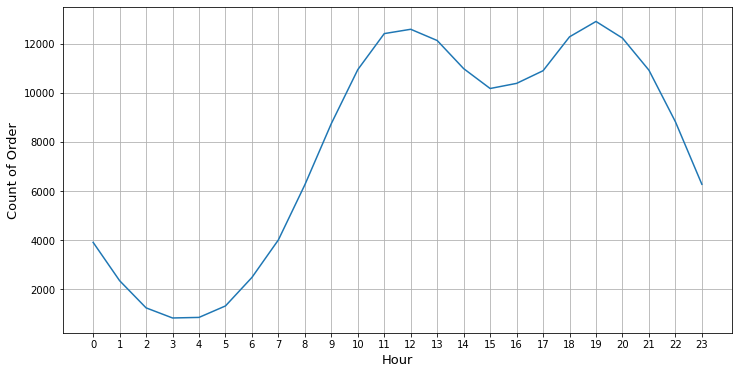

In [23]:
# Create a plot for visualizing
plt.figure(figsize = (12,6))
plt.plot("Hour","Product",data = group_time)
plt.title("")
plt.xlabel("Hour",fontsize = 13)
plt.ylabel("Count of Order",fontsize = 13)
plt.xticks(group_time["Hour"])
plt.grid()
plt.show()

### We can see that number of orders peaks at 2 time frames which are 11am - 12am and 7pm - 8pm. This is because customers likely to have more free time in those 2 time frames. Therefore, those are the best time for the company to run the advertisement in order to maximize the advertising performance. To be more specific, the company should prioritize the second time frame because customers will have more time to order what they want to purchase.

#### Question 4: What products are most often sold together?

In [24]:
df = up_df[up_df['Order ID'].duplicated(keep=False)] #If there are more than 1 Order ID(s), we keep to the dataframe

df["Grouped"] = df.groupby("Order ID")['Product'].transform(lambda x: ','.join(x)) #Create a column named 'Grouped' containing all the products in 1 Order ID

df = df[['Order ID','Grouped']].drop_duplicates() #Drop the duplicates rows which contain several same Order ID and Grouped
df.head()

<ipython-input-24-17f569529fe9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [25]:
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10): 
    print(key,value)

# We put all the values to a one dataframe for visualization
count_df = pd.DataFrame(list(count.items()),columns= ['Items','Count'])

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [26]:
# We only want to see top 10 go-together items so the dataframe should only contains 10 rows 
count_df = count_df.sort_values(by='Count',ascending = False).head(10)
count_df.reset_index(inplace = True,drop = True)
count_df.head(10)

,Items,Count
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361
5,"(iPhone, Apple Airpods Headphones)",360
6,"(Google Phone, Bose SoundSport Headphones)",220
7,"(USB-C Charging Cable, Wired Headphones)",160
8,"(Vareebadd Phone, Wired Headphones)",143
9,"(Lightning Charging Cable, Wired Headphones)",92


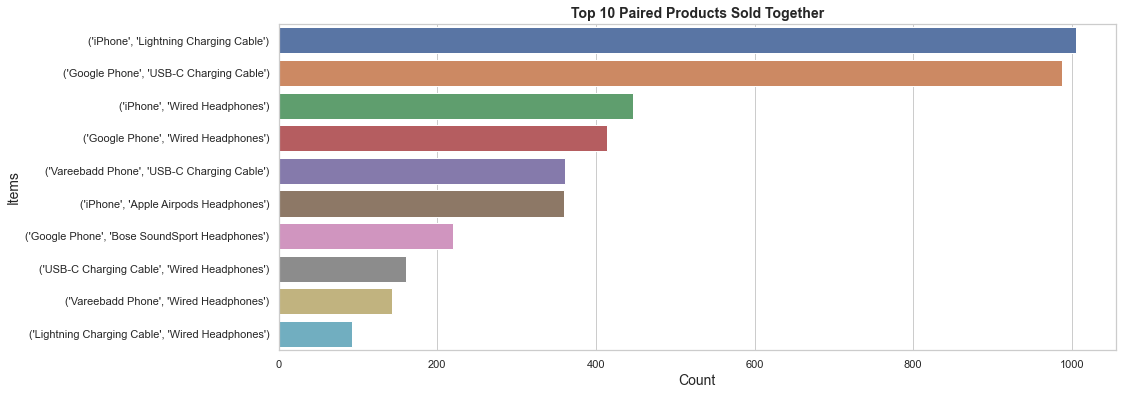

In [52]:
import seaborn as sns
plt.figure(figsize=(15, 6)) 
sns.set(style='whitegrid') 
sns.barplot(y = 'Items',x = 'Count',data = count_df) 
plt.title("Top 10 Paired Products Sold Together", fontsize = 14,fontweight = 'bold')
plt.ylabel('Items',fontsize =14) 
plt.xlabel('Count',fontsize =14) 
plt.show()

#### Question 5: What product sold the most? Why do you think it sold the most?

In [28]:
group_prod = up_df.groupby('Product').sum()
group_prod.reset_index(inplace = True)
group_prod.sort_values("Quantity Ordered",ascending = False).head(10)

,Product,Quantity Ordered,Price Each,Month,Total sales,Hour,Minute
5,AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
4,AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
15,USB-C Charging Cable,23975,261740.85,154819,286501.25,314645,647586
12,Lightning Charging Cable,23217,323787.10,153092,347094.15,312529,634442
17,Wired Headphones,20557,226395.18,133397,246478.43,271720,554023
6,Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
7,Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
2,27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
18,iPhone,6849,4789400.00,47941,4794300.00,98657,201688
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331


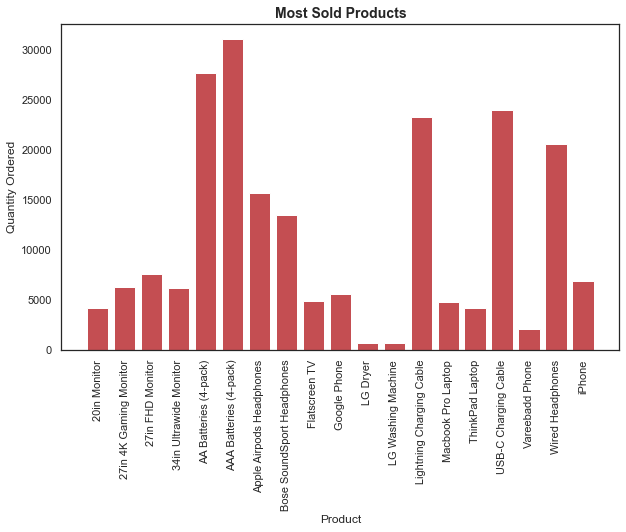

In [39]:
plt.figure(figsize=(10,6))
sns.set_theme(style="white", palette=None)
plt.bar("Product","Quantity Ordered",data= group_prod,color = 'r')
plt.xticks(rotation="vertical")
plt.title("Most Sold Products",fontsize=14, fontweight="bold")
plt.xlabel("Product",fontsize=12)
plt.ylabel("Quantity Ordered",fontsize=12)
plt.show()

In [30]:
# Overlay chart
prices = up_df.groupby("Product").mean()
prices.reset_index(inplace = True)
prices.head()

,Product,Quantity Ordered,Price Each,Month,Total sales,Hour,Minute
0,20in Monitor,1.006828,109.99,7.153377,110.740968,14.329188,29.810290
1,27in 4K Gaming Monitor,1.002247,389.99,7.133226,390.866382,14.593258,29.587640
2,27in FHD Monitor,1.005728,149.99,7.001199,150.849141,14.325296,29.299054
3,34in Ultrawide Monitor,1.002912,379.99,7.005986,381.096588,14.411260,29.684517
4,AA Batteries (4-pack),1.343004,3.84,7.073820,5.157137,14.498809,29.598046


In [33]:
product = [product for product,df in up_df.groupby('Product') ]
product

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

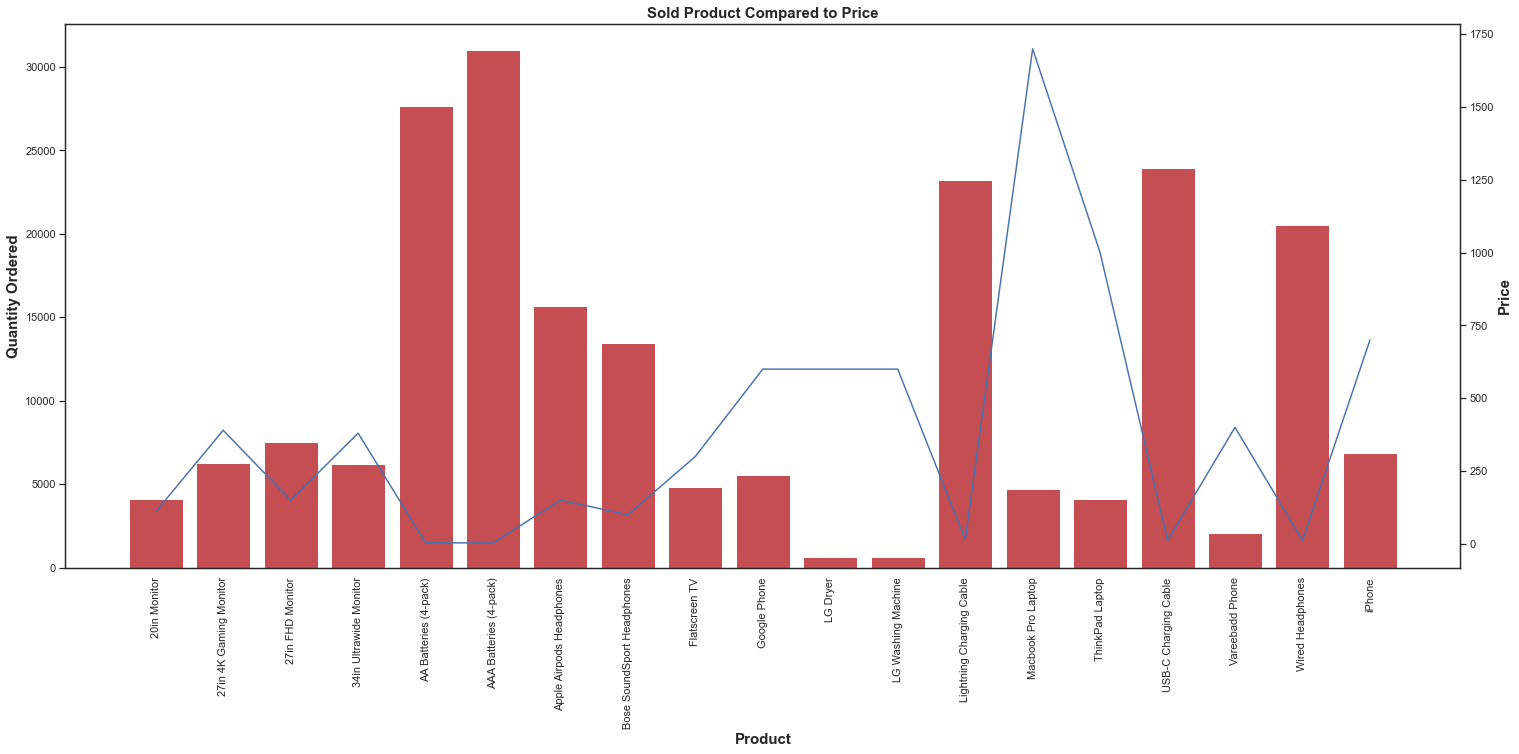

In [49]:

fig, ax1 = plt.subplots(figsize=(25,10))
ax2 = ax1.twinx() # Set twinx for a overlay chart
ax1.bar("Product","Quantity Ordered",data=group_prod,color='r') #Plot a bar chat
ax2.plot("Product", "Price Each", 'b-',data=prices) #Plot a line chart
ax1.set_title("Sold Product Compared to Price",fontsize=15,fontweight='bold') #Set the title for the product
ax1.set_xlabel("Product",fontsize=15,fontweight='bold') #Set the x label for the product
ax1.set_ylabel("Quantity Ordered",fontsize=15,fontweight='bold') #Set the y label for the quantity in ax1
ax2.set_ylabel("Price",fontsize=15,fontweight='bold') #Set the y label for the price in ax2
ax1.set_xticks(product) 
ax1.set_xticklabels(product, rotation = 90)
plt.show()

### We can see that there is correlation between price of the product and its sold quantity. The cheaper the product is, the more it is sold and vice versa. 

# End